### Importing Dependencies and reading data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os

In [2]:
pwd

'c:\\Users\\sjasm\\evdatasets\\notebooks and experiments'

In [3]:
os.chdir('../')

In [4]:
pwd

'c:\\Users\\sjasm\\evdatasets'

In [5]:
df = pd.read_csv('datasets/ev_data1.csv')

In [6]:
df.head()

,Title,Battery Size (kWh),Top Speed (km/h),Range (km),Efficiency (Wh/km),Fastcharge Speed (km/h),price_pounds
0,Tesla Model 3,57.5,225,405,142,680,42990.0
1,Tesla Model Y Long Range Dual Motor,75.0,217,435,172,670,52990.0
2,Tesla Model 3 Long Range Dual Motor,75.0,233,485,155,750,50990.0
3,BYD ATTO 3,60.5,160,330,183,370,37195.0
4,Tesla Model 3,57.5,201,420,137,700,44000.0


### Descriptive statistics

In [7]:
df.shape

(367, 7)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Title                    367 non-null    object 
 1   Battery Size (kWh)       367 non-null    float64
 2   Top Speed (km/h)         367 non-null    int64  
 3   Range (km)               367 non-null    int64  
 4   Efficiency (Wh/km)       367 non-null    int64  
 5   Fastcharge Speed (km/h)  367 non-null    int64  
 6   price_pounds             233 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 20.2+ KB


In [9]:
df.describe()

,Battery Size (kWh),Top Speed (km/h),Range (km),Efficiency (Wh/km),Fastcharge Speed (km/h),price_pounds
count,367.000000,367.000000,367.000000,367.000000,367.000000,233.000000
mean,71.436785,181.297003,371.021798,195.171662,548.937330,61719.433476
std,19.996469,36.345813,105.113026,31.928035,233.301826,36024.746358
min,21.300000,125.000000,135.000000,137.000000,170.000000,26000.000000
25%,57.750000,160.000000,300.000000,171.000000,360.000000,38000.000000
50%,71.000000,180.000000,380.000000,188.000000,530.000000,50830.000000
75%,85.700000,200.000000,442.500000,208.000000,665.000000,73245.000000
max,123.000000,320.000000,685.000000,295.000000,1290.000000,350000.000000


In [10]:
df['price_pounds'].median()

50830.0

In [11]:
df.isnull().sum()

Title                        0
Battery Size (kWh)           0
Top Speed (km/h)             0
Range (km)                   0
Efficiency (Wh/km)           0
Fastcharge Speed (km/h)      0
price_pounds               134
dtype: int64

In [12]:
136/df.shape[0]*100

37.05722070844686

c:\Users\sjasm\anaconda3\envs\fastfoodenv\lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


<Axes: xlabel='price_pounds'>

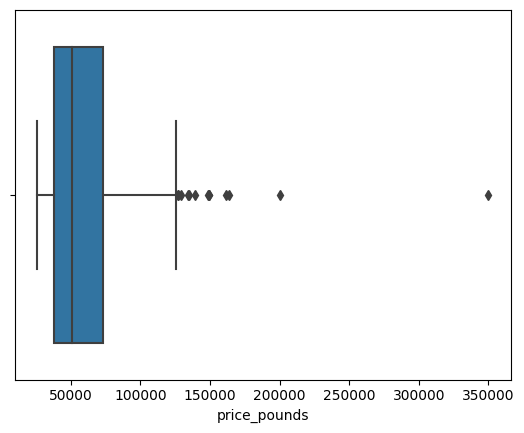

In [13]:
##checking outliers in price column
sns.boxplot(x = 'price_pounds', data = df, orient= "v")

##outliers are present so we will apply median imputation

#### Method 1. removing null values

In [14]:
df_removed = df.dropna(subset=['price_pounds'])

In [15]:
df_removed.isnull().sum()

Title                      0
Battery Size (kWh)         0
Top Speed (km/h)           0
Range (km)                 0
Efficiency (Wh/km)         0
Fastcharge Speed (km/h)    0
price_pounds               0
dtype: int64

In [16]:
df_removed.shape

(233, 7)

#### Method 1. performing median imputation

In [17]:
df['price_pounds'] = df['price_pounds'].fillna(df['price_pounds'].median())

In [18]:
df.isnull().sum()

Title                      0
Battery Size (kWh)         0
Top Speed (km/h)           0
Range (km)                 0
Efficiency (Wh/km)         0
Fastcharge Speed (km/h)    0
price_pounds               0
dtype: int64

c:\Users\sjasm\anaconda3\envs\fastfoodenv\lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


<Axes: xlabel='price_pounds'>

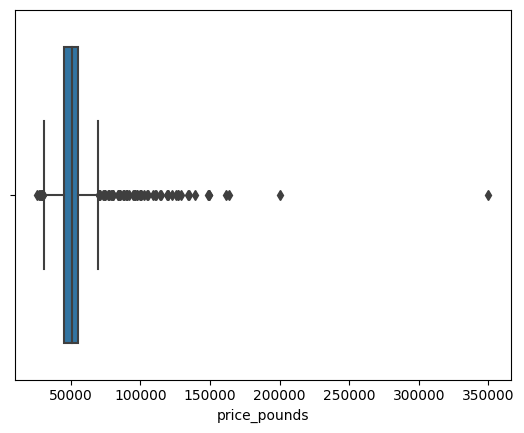

In [19]:
sns.boxplot(x = 'price_pounds', data = df, orient= "v")

In [20]:
df.duplicated().sum()

3

In [21]:
df = df.drop_duplicates()

In [22]:
df.duplicated().sum()

0

In [23]:
df.describe()

,Battery Size (kWh),Top Speed (km/h),Range (km),Efficiency (Wh/km),Fastcharge Speed (km/h),price_pounds
count,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000
mean,71.369780,181.041209,370.508242,195.280220,547.994505,57816.478022
std,20.015007,36.384327,105.254264,32.014865,233.967081,29266.201301
min,21.300000,125.000000,135.000000,137.000000,170.000000,26000.000000
25%,57.875000,160.000000,300.000000,171.000000,360.000000,45183.750000
50%,70.750000,180.000000,380.000000,188.000000,520.000000,50830.000000
75%,85.100000,200.000000,440.000000,208.250000,660.000000,55000.000000
max,123.000000,320.000000,685.000000,295.000000,1290.000000,350000.000000


### Visualizations

#### Univariate Analysis using distplot

C:\Users\sjasm\AppData\Local\Temp\ipykernel_6500\4105172114.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], ax = ax)
C:\Users\sjasm\AppData\Local\Temp\ipykernel_6500\4105172114.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], ax = ax)
C:\Users\sjasm\AppData\Local\T

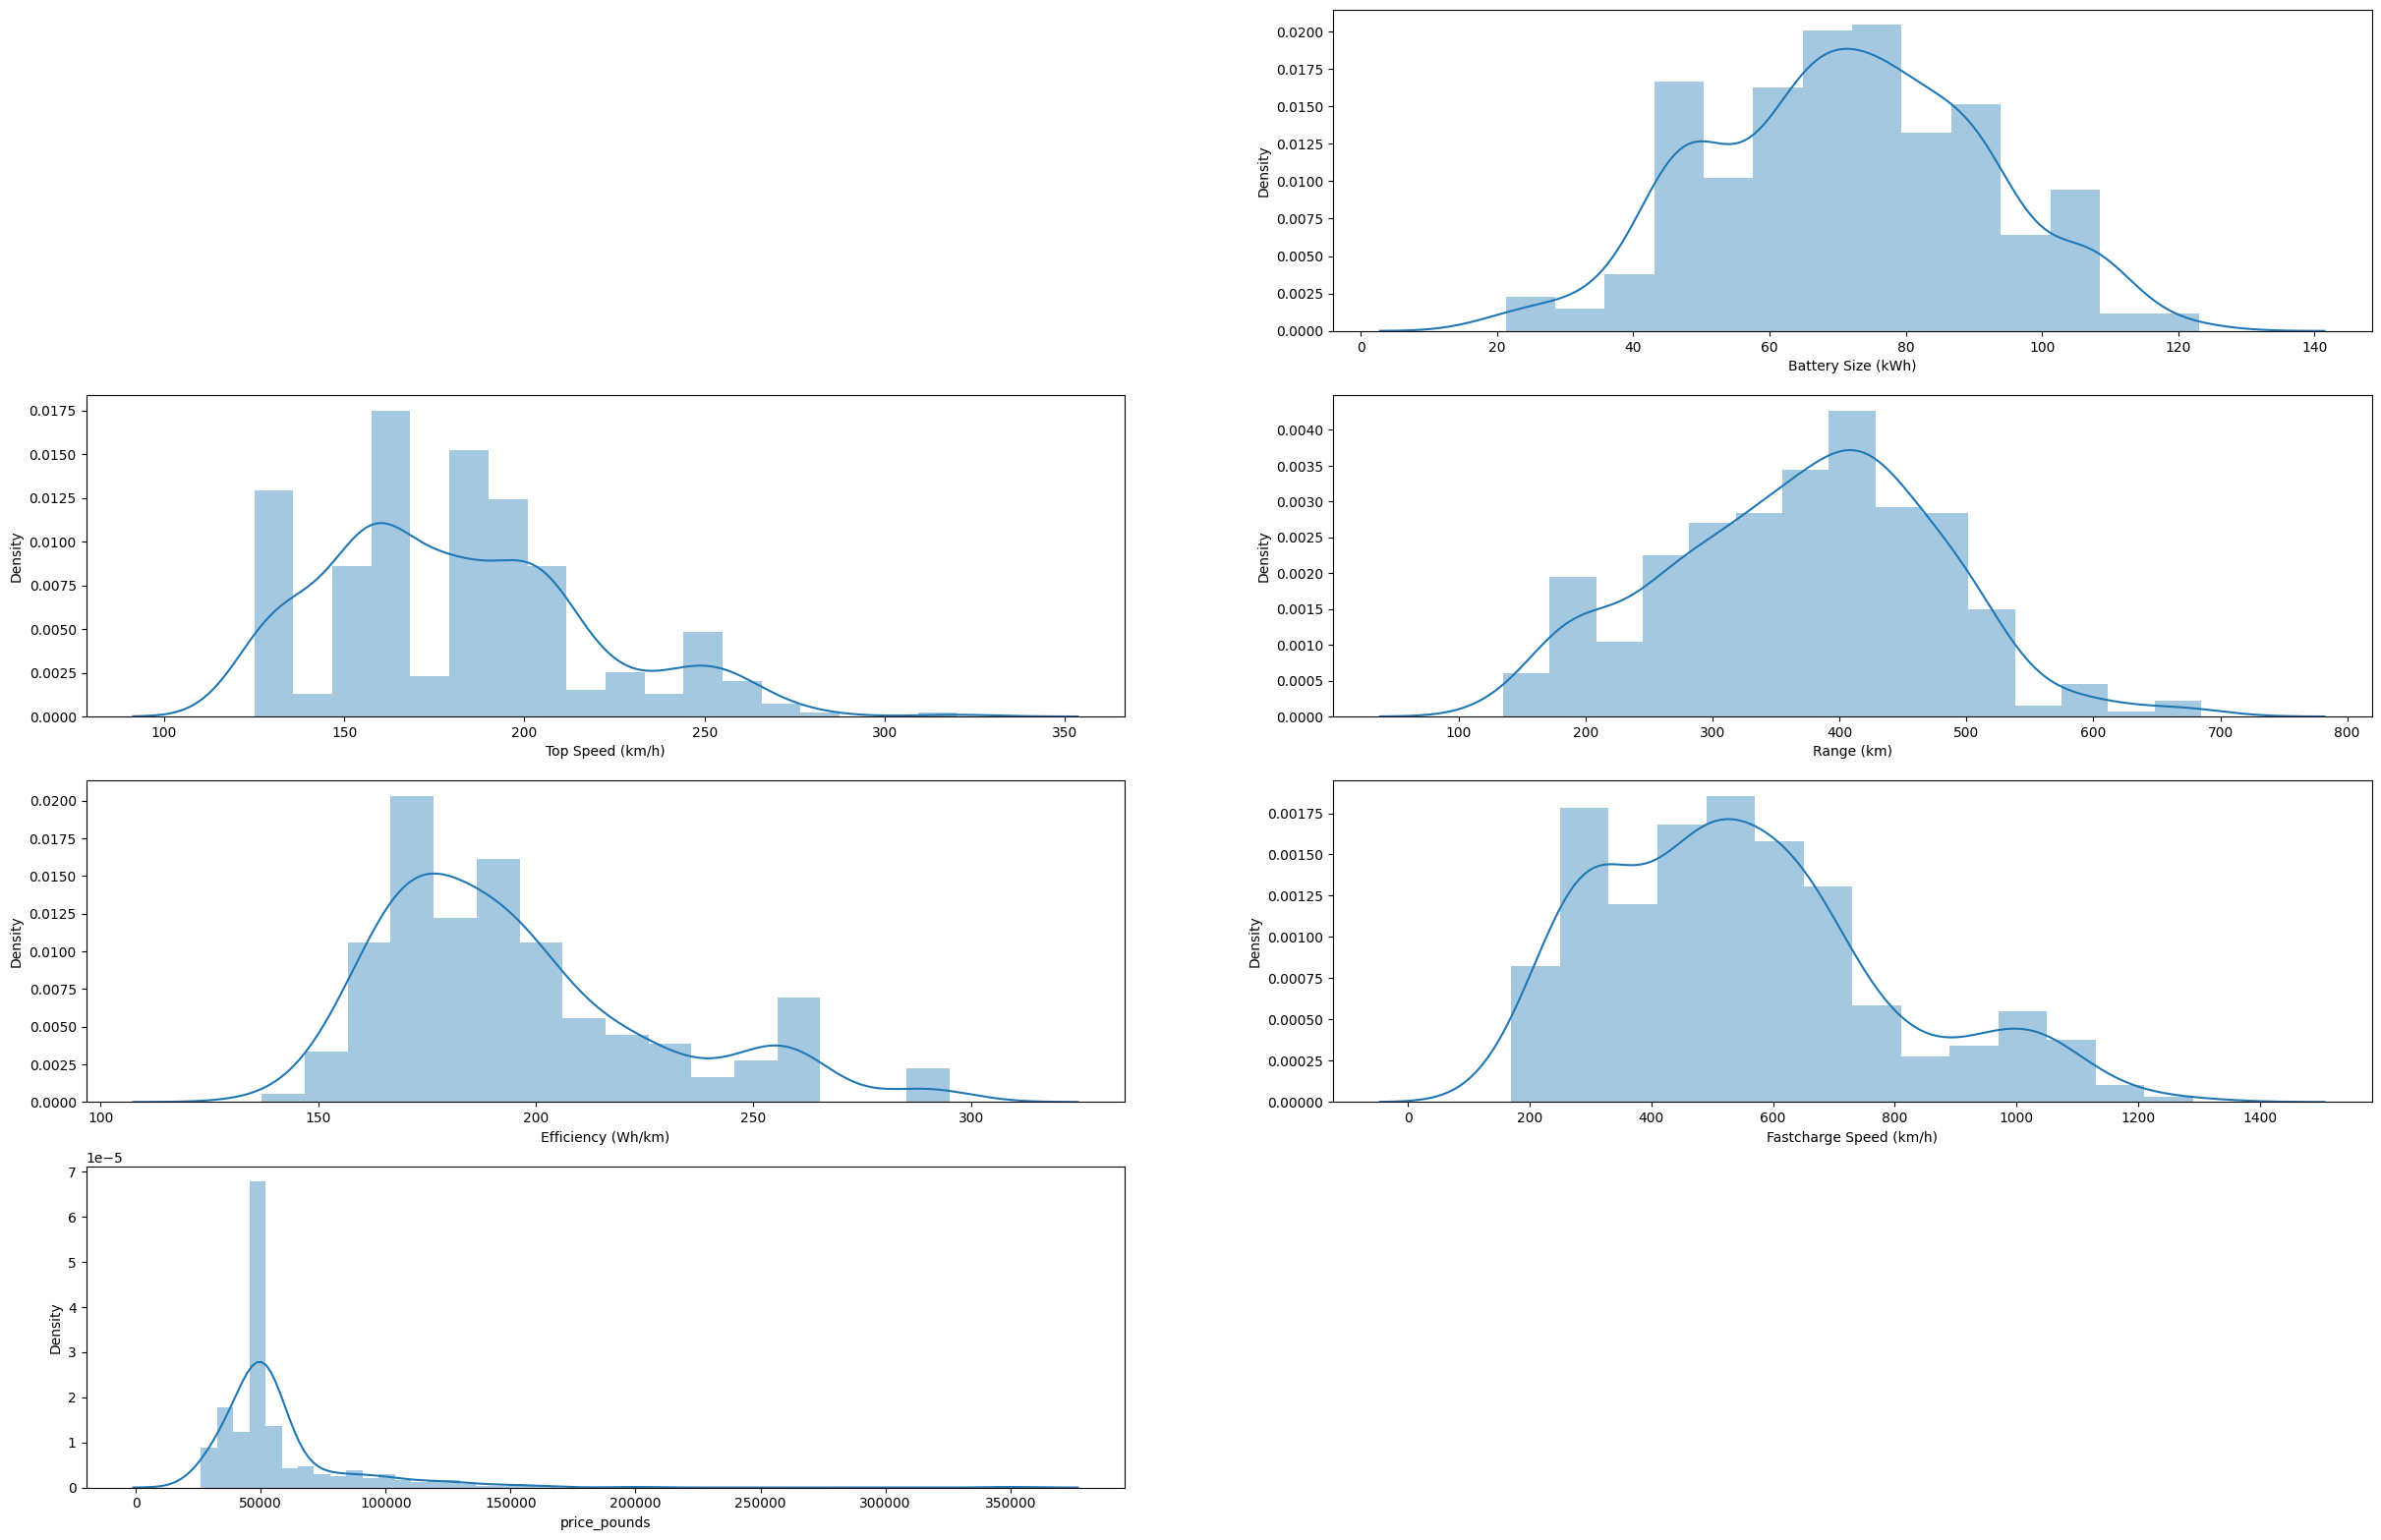

In [24]:
#checking feature distributions using 
plt.figure(figsize=(30,45))

for i, column in enumerate(df.columns):
    if df[column].dtype!= 'object':
        ax = plt.subplot(9, 2, i+1)
        sns.distplot(df[column], ax = ax)
        plt.xlabel(column)
plt.show()

C:\Users\sjasm\AppData\Local\Temp\ipykernel_6500\3300257031.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], ax = ax)
C:\Users\sjasm\AppData\Local\Temp\ipykernel_6500\3300257031.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], ax = ax)
C:\Users\sjasm\AppData\Local\T

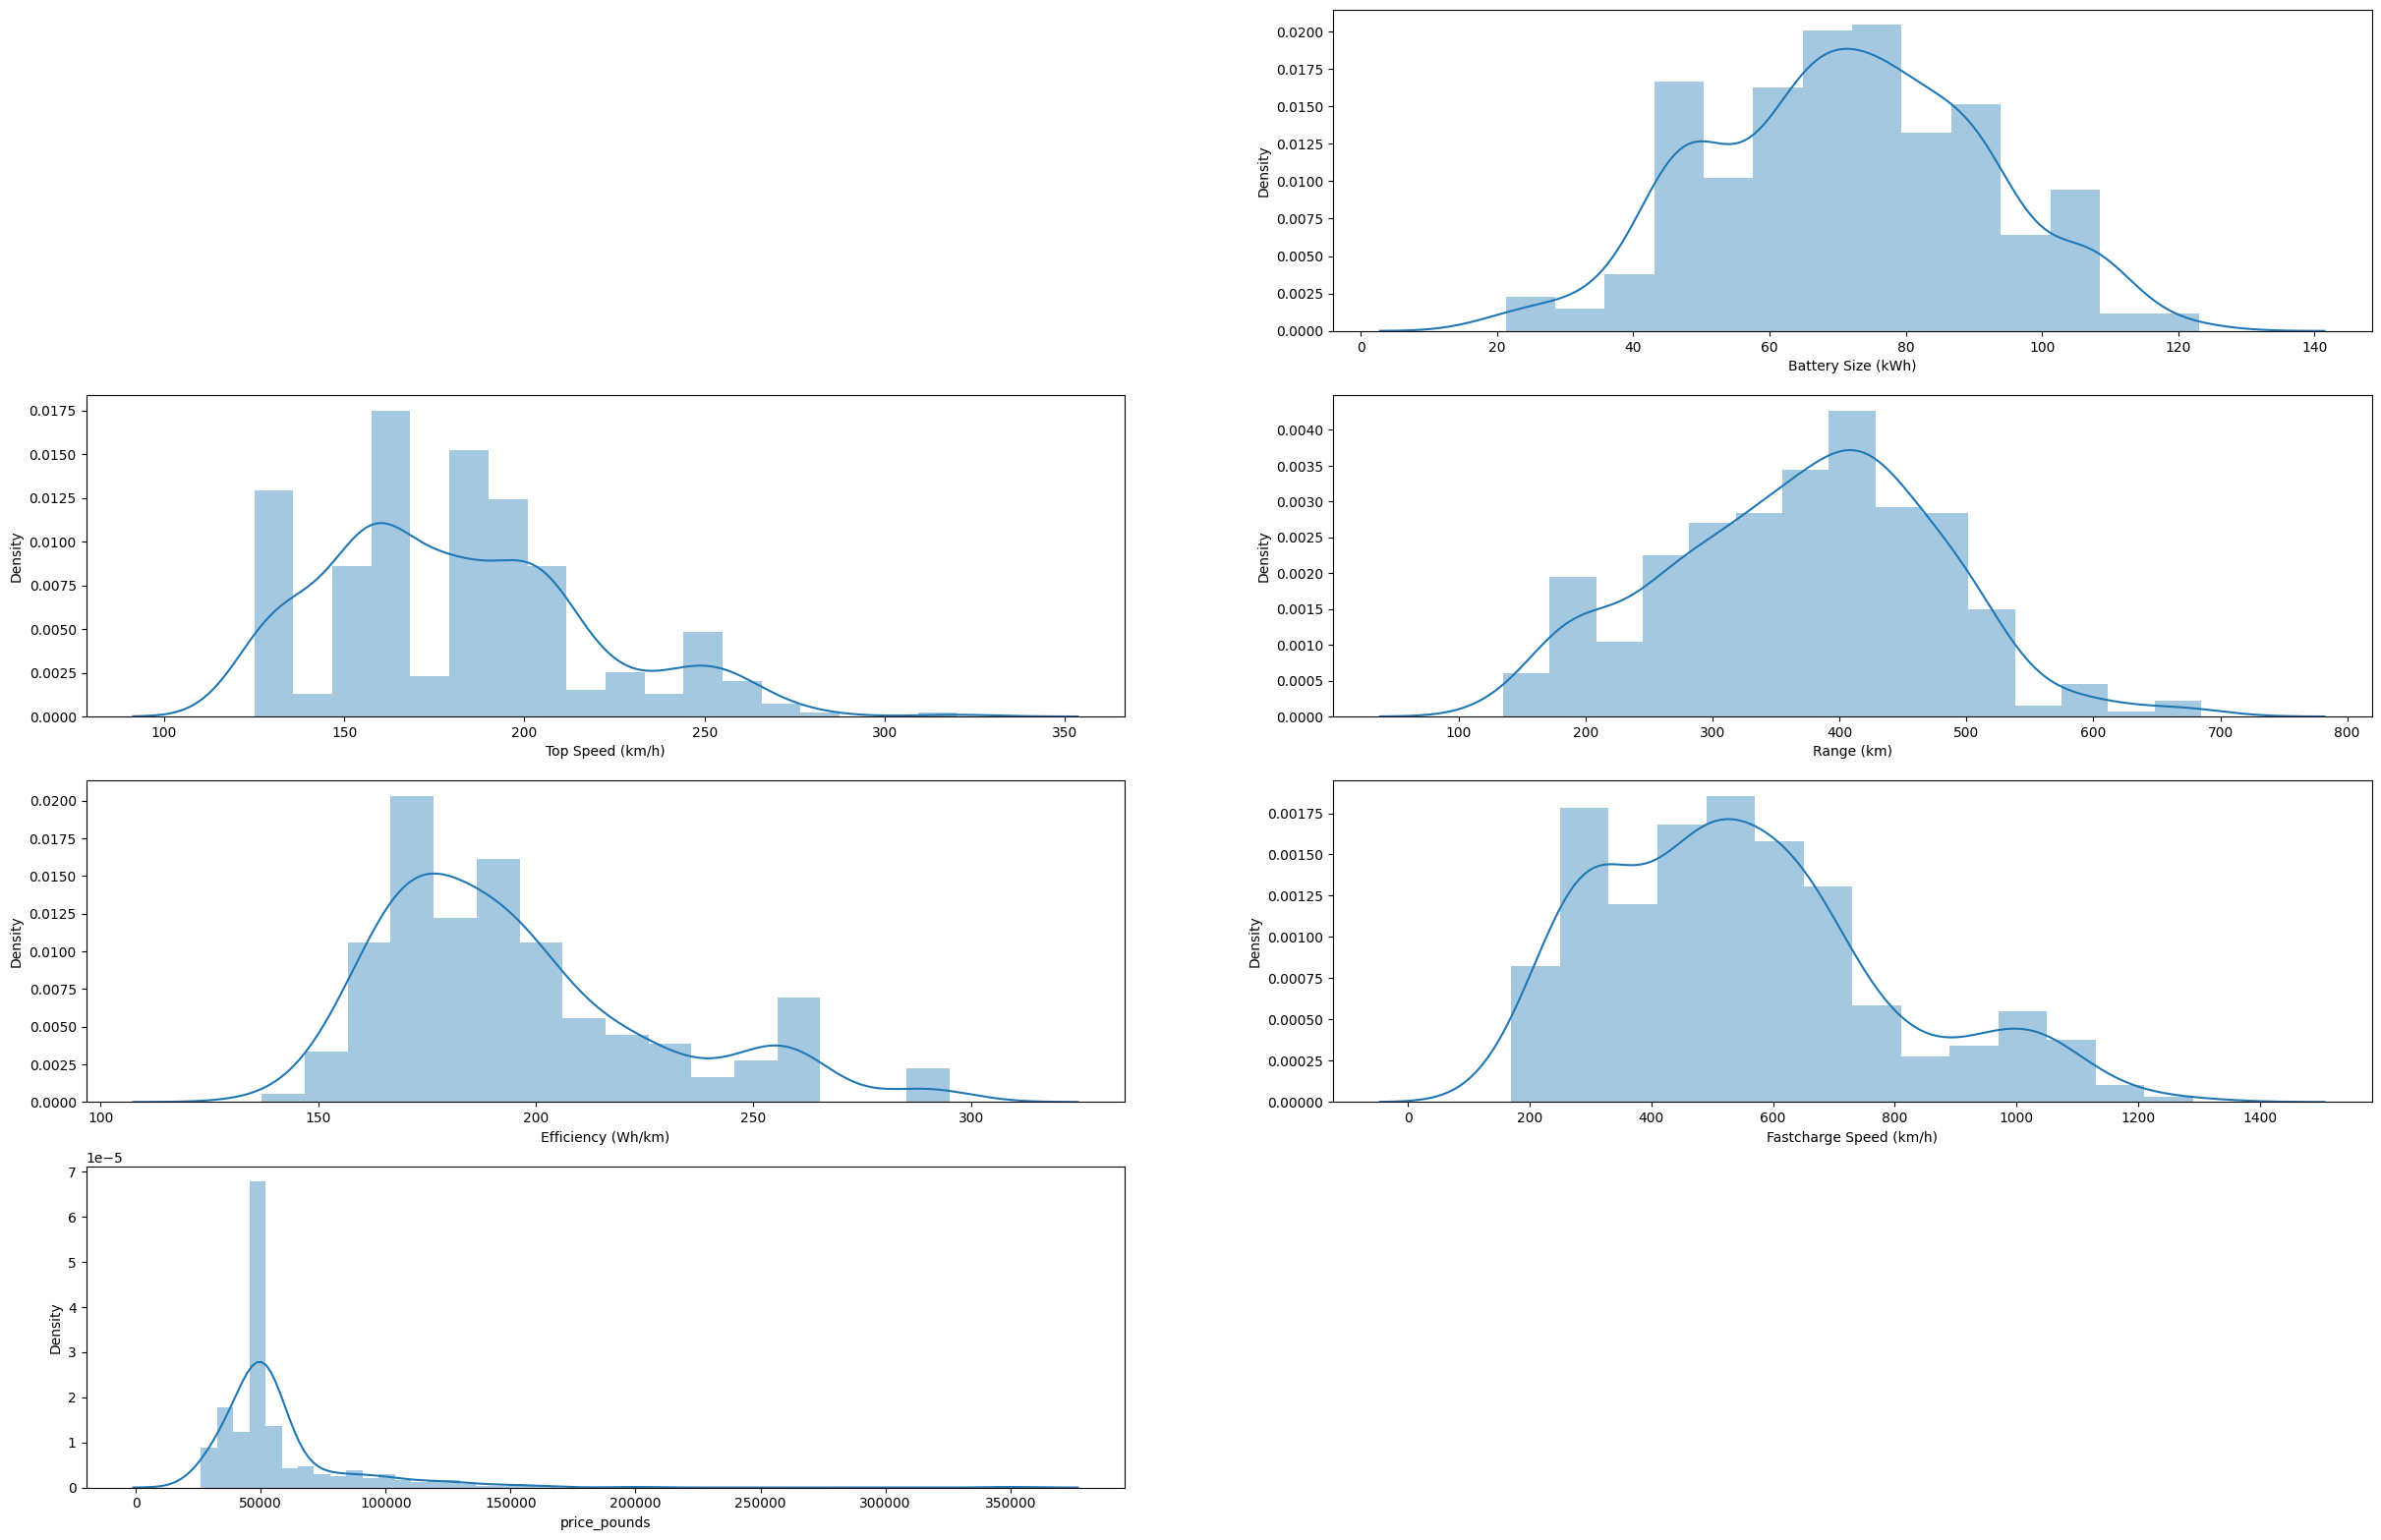

In [25]:
plt.figure(figsize=(30,45))

for i, column in enumerate(df.columns):
    if df_removed[column].dtype!= 'object':
        ax = plt.subplot(9, 2, i+1)
        sns.distplot(df[column], ax = ax)
        plt.xlabel(column)
plt.show()

inference: None of them follow perfect normal distribution

### Bivariate Analysis

Text(0.5, 1.0, ' Relationship between Price and Effieciency')

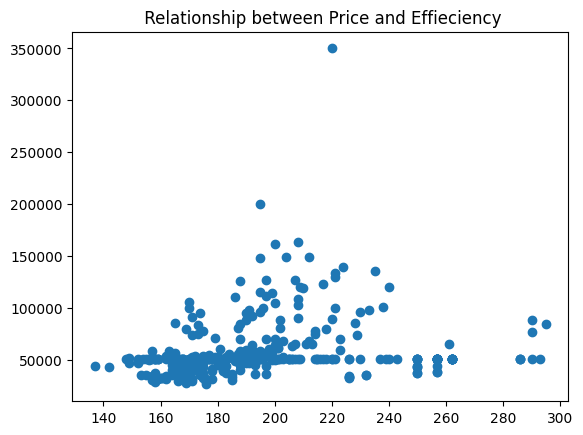

In [26]:
x = df['Efficiency (Wh/km)']
y = df['price_pounds']
plt.scatter(x,y)
plt.title(' Relationship between Price and Effieciency')

(0.0, 366200.0)

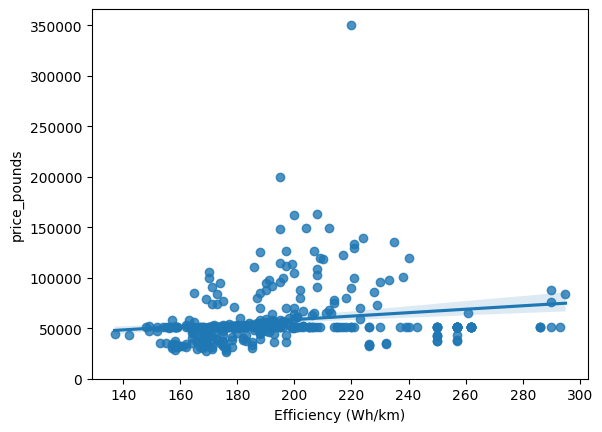

In [27]:
##correlation
sns.regplot(x = 'Efficiency (Wh/km)', y = 'price_pounds', data = df)
plt.ylim(0,)

Inference: Weak correlation between the variables

(0.0, 366200.0)

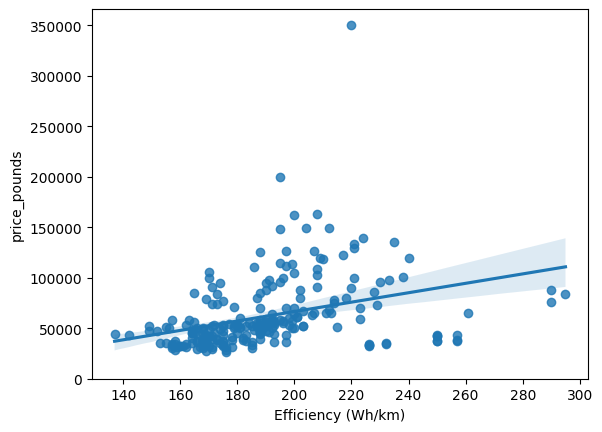

In [28]:
sns.regplot(x = 'Efficiency (Wh/km)', y = 'price_pounds', data = df_removed)
plt.ylim(0,)

Inference: Slight +ve correlcation betweenthe variables

Calculating strength of correlation

In [29]:
pearson_coeff1, p_val1 = stats.pearsonr(df['Efficiency (Wh/km)'], df['price_pounds'])
print(pearson_coeff1, p_val1)

0.1867141793207361 0.000341531526477888


In [30]:
pearson_coeff2, p_val2 = stats.pearsonr(df_removed['Efficiency (Wh/km)'], df_removed['price_pounds'])
print(pearson_coeff2, p_val2)

0.3474095745819416 5.180473166463937e-08


Inference:
1. pearson_coeff1 < pearson_coeff2 and both of them are +ve so in df_removed Efficeincy is slightly more +vely correlated with price than df. 
2. For pval2 < 0.001 (strong certainity associated)

In [31]:
##cheking other valiable relationships

df.iloc[:,1:].corr()['price_pounds'].sort_values()

Efficiency (Wh/km)         0.186714
Range (km)                 0.363920
Fastcharge Speed (km/h)    0.429833
Battery Size (kWh)         0.500289
Top Speed (km/h)           0.608793
price_pounds               1.000000
Name: price_pounds, dtype: float64

Inference: Top Speed and battery size are highly correlated with price.

In [32]:
df_removed.iloc[:,1:].corr()['price_pounds'].sort_values()

Efficiency (Wh/km)         0.347410
Fastcharge Speed (km/h)    0.482235
Range (km)                 0.495022
Battery Size (kWh)         0.653767
Top Speed (km/h)           0.724216
price_pounds               1.000000
Name: price_pounds, dtype: float64

### Correlation Heatmap

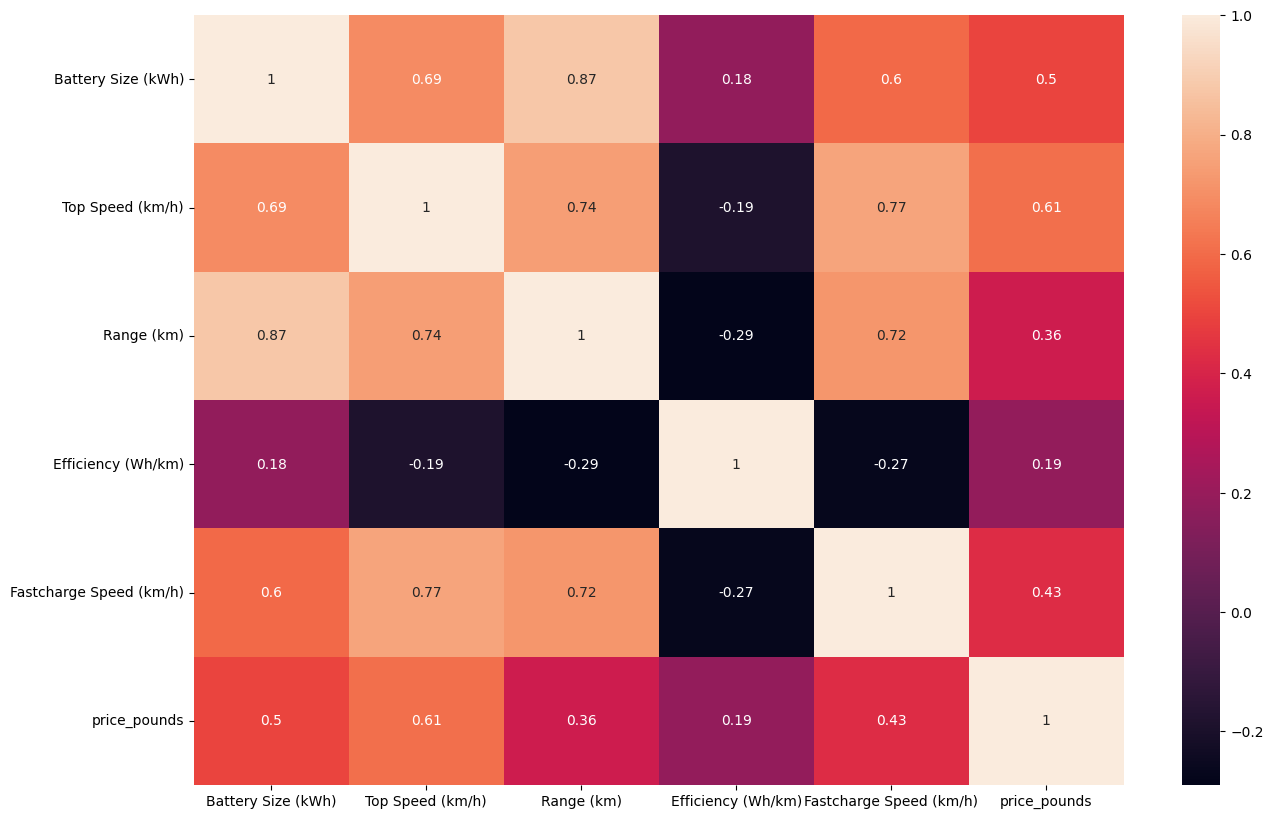

In [33]:
plt.figure(figsize=(15,10))
sns.heatmap(df.iloc[:,1:].corr(), annot=True)
plt.show()

Inference: 
1. Range and Battery size are highly correlated.
2. Top speed and Range are also correlated.

### Scaling Dataframe

In [34]:
!pip install threadpoolctl==3.1.0

  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 3.2.0
    Uninstalling threadpoolctl-3.2.0:
      Successfully uninstalled threadpoolctl-3.2.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pycaret 3.0.4 requires cloudpickle, which is not installed.
pycaret 3.0.4 requires kaleido>=0.2.1, which is not installed.
pycaret 3.0.4 requires nbformat>=4.2.0, which is not installed.
pycaret 3.0.4 requires plotly>=5.0.0, which is not installed.
pycaret 3.0.4 requires pandas<2.0.0,>=1.3.0, but you have pandas 2.0.3 which is incompatible.
pycaret 3.0.4 requires scikit-learn<1.3.0,>=1.0, but you have scikit-learn 1.3.0 which is incompatible.


In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, SpectralBiclustering
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.mixture import GaussianMixture

In [36]:
df_strip = df.iloc[:,1:]

In [37]:
df_strip.head()

,Battery Size (kWh),Top Speed (km/h),Range (km),Efficiency (Wh/km),Fastcharge Speed (km/h),price_pounds
0,57.5,225,405,142,680,42990.0
1,75.0,217,435,172,670,52990.0
2,75.0,233,485,155,750,50990.0
3,60.5,160,330,183,370,37195.0
4,57.5,201,420,137,700,44000.0


In [38]:
df_strip.info()

<class 'pandas.core.frame.DataFrame'>
Index: 364 entries, 0 to 366
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Battery Size (kWh)       364 non-null    float64
 1   Top Speed (km/h)         364 non-null    int64  
 2   Range (km)               364 non-null    int64  
 3   Efficiency (Wh/km)       364 non-null    int64  
 4   Fastcharge Speed (km/h)  364 non-null    int64  
 5   price_pounds             364 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 19.9 KB


In [39]:
std_scaler = StandardScaler()

In [40]:
df_scaled = std_scaler.fit_transform(df_strip)

In [41]:
df_scaled_pd = pd.DataFrame(df_scaled)

In [42]:
df_scaled_pd.head()

,0,1,2,3,4,5
0,-0.693923,1.209842,0.328150,-1.666525,0.564982,-0.507305
1,0.181625,0.989665,0.613567,-0.728170,0.522182,-0.165143
2,0.181625,1.430020,1.089261,-1.259904,0.864581,-0.233576
3,-0.543829,-0.579100,-0.385391,-0.384107,-0.761814,-0.705587
4,-0.693923,0.549310,0.470859,-1.822917,0.650582,-0.472747


In [43]:
df_scaled_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       364 non-null    float64
 1   1       364 non-null    float64
 2   2       364 non-null    float64
 3   3       364 non-null    float64
 4   4       364 non-null    float64
 5   5       364 non-null    float64
dtypes: float64(6)
memory usage: 17.2 KB


### Performing KMeans Clustering without PCA (for Segementation)

In [44]:
###finding k value using elbow mehtod
inrt = []
for i in range(2,10):
    kmean = KMeans(n_clusters = i)
    kmean.fit_transform(df_scaled_pd)
    inrt.append(kmean.inertia_)

c:\Users\sjasm\anaconda3\envs\fastfoodenv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


c:\Users\sjasm\anaconda3\envs\fastfoodenv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\sjasm\anaconda3\envs\fastfoodenv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\sjasm\anaconda3\envs\fastfoodenv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\sjasm\anaconda3\envs\fastfoodenv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default valu

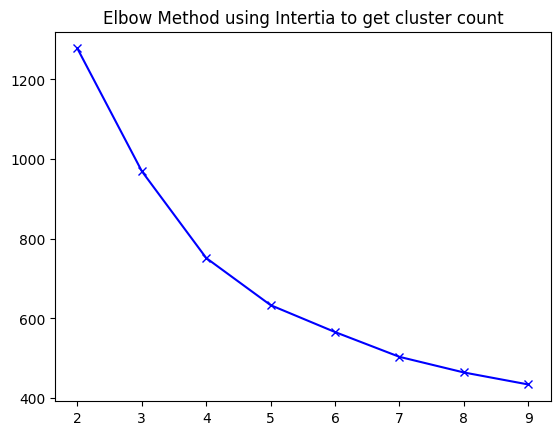

In [45]:
plt.plot(range(2,10), inrt, 'bx-')
plt.title('Elbow Method using Intertia to get cluster count')
plt.show()

Inference: Elbow shift is observable at k =4

c:\Users\sjasm\anaconda3\envs\fastfoodenv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\sjasm\anaconda3\envs\fastfoodenv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\sjasm\anaconda3\envs\fastfoodenv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\sjasm\anaconda3\envs\fastfoodenv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default valu

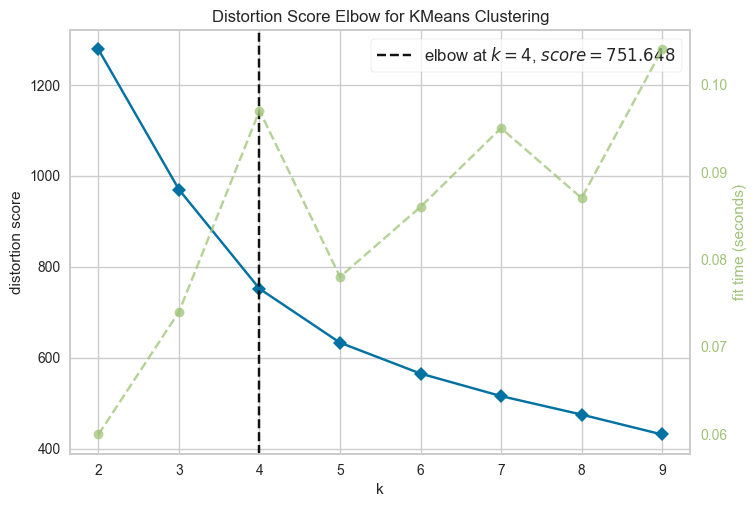

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [46]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k = (2,10)).fit(df_scaled_pd)
visualizer.show()

Taking 'k' = 4

In [47]:
kmeans = KMeans(n_clusters=4)
kmeans_labels = kmeans.fit_predict(df_scaled_pd)
df_scaled_pd['Cluster'] = kmeans_labels

c:\Users\sjasm\anaconda3\envs\fastfoodenv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


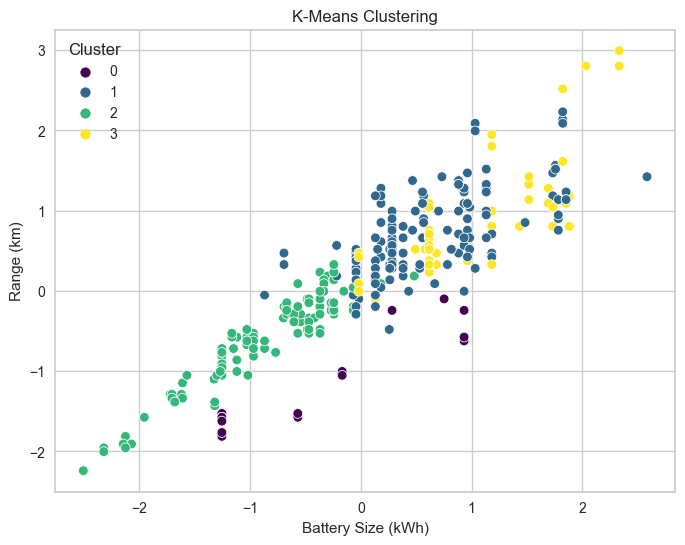

In [48]:
##choosing two features for scatter plot visualization

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_scaled_pd[0], y=df_scaled_pd[2], hue='Cluster', data=df_scaled_pd, palette='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Battery Size (kWh)')
plt.ylabel('Range (km)')
plt.show()


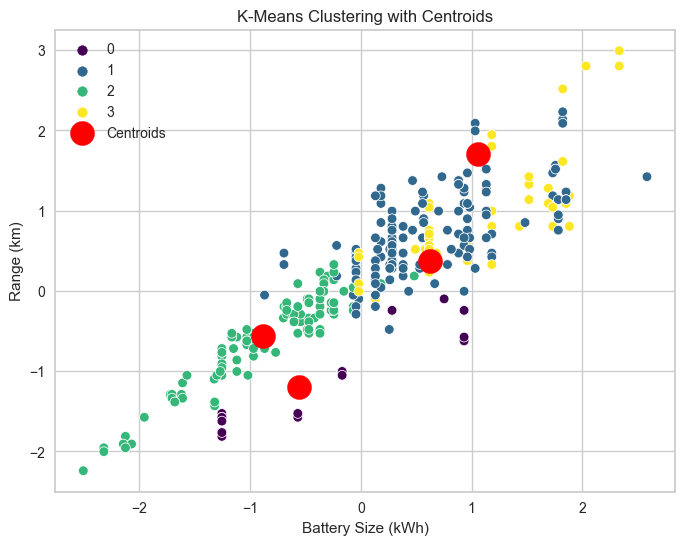

In [49]:
##plotting centroids

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_scaled_pd[0], y=df_scaled_pd[2], hue='Cluster', data=df_scaled_pd, palette='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title('K-Means Clustering with Centroids')
plt.xlabel('Battery Size (kWh)')
plt.ylabel('Range (km)')
plt.legend()
plt.show()

In [50]:
df['Clusters'] = kmeans_labels

<Axes: xlabel='Clusters', ylabel='count'>

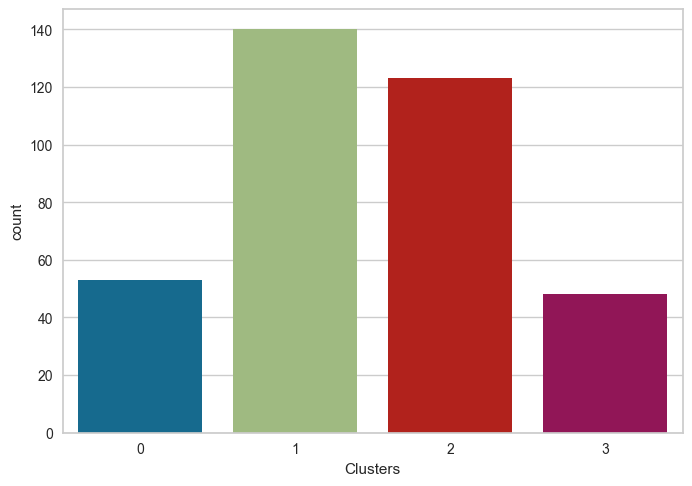

In [51]:
##cluster distribution

sns.countplot(x = 'Clusters', data = df)

In [52]:
df.head()

,Title,Battery Size (kWh),Top Speed (km/h),Range (km),Efficiency (Wh/km),Fastcharge Speed (km/h),price_pounds,Clusters
0,Tesla Model 3,57.5,225,405,142,680,42990.0,1
1,Tesla Model Y Long Range Dual Motor,75.0,217,435,172,670,52990.0,1
2,Tesla Model 3 Long Range Dual Motor,75.0,233,485,155,750,50990.0,1
3,BYD ATTO 3,60.5,160,330,183,370,37195.0,2
4,Tesla Model 3,57.5,201,420,137,700,44000.0,1


### Segement Analysis

c:\Users\sjasm\anaconda3\envs\fastfoodenv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\sjasm\anaconda3\envs\fastfoodenv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\sjasm\anaconda3\envs\fastfoodenv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\sjasm\anaconda3\envs\fastfoodenv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\sjasm\anaconda3\envs\fastfoodenv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\sjasm\anaconda3\envs\fastfoodenv\lib\site-packages\seaborn\axisgrid.py:118: UserW

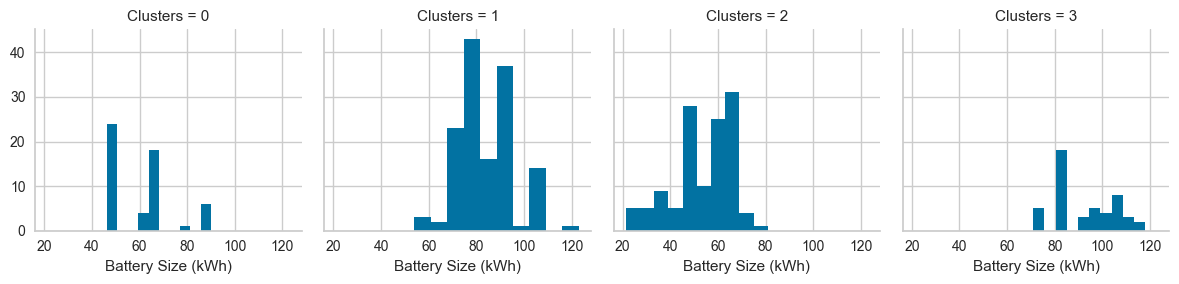

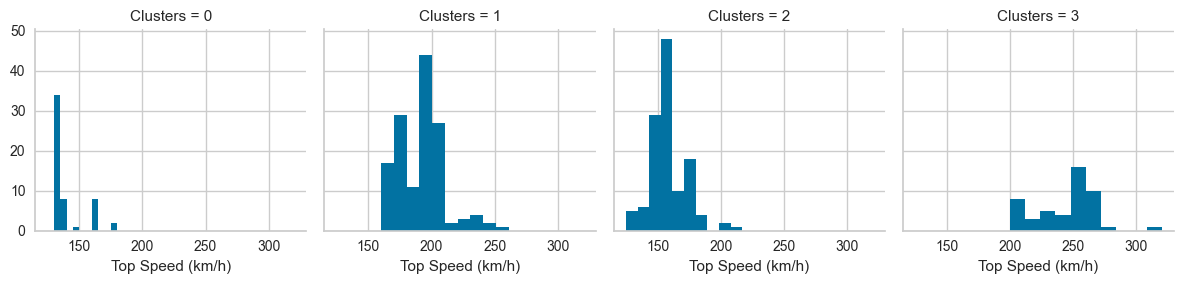

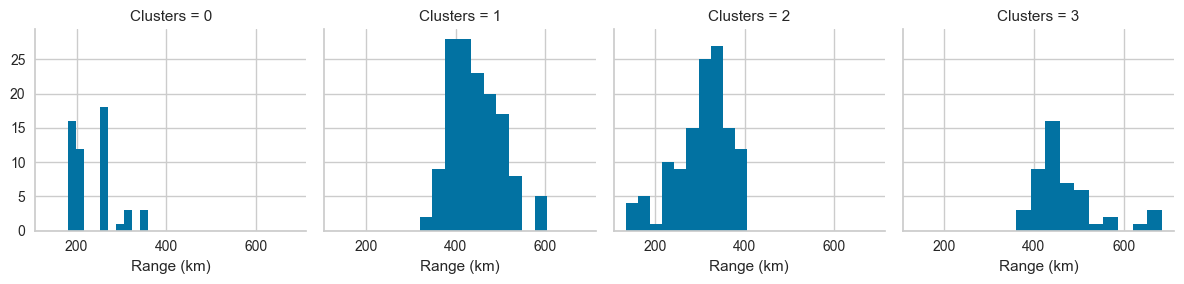

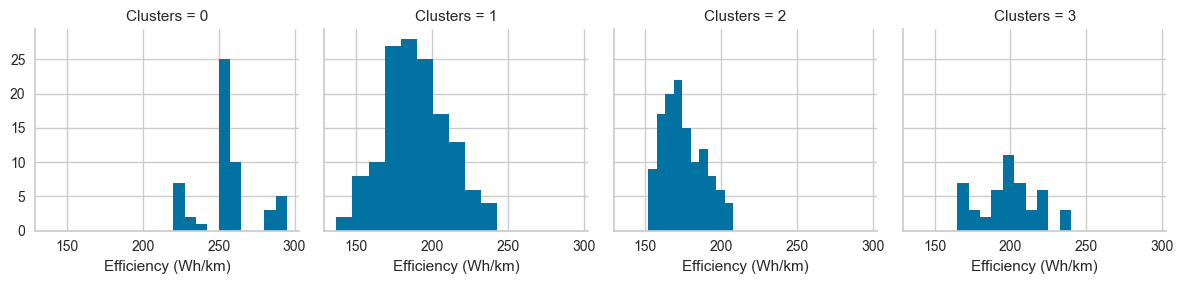

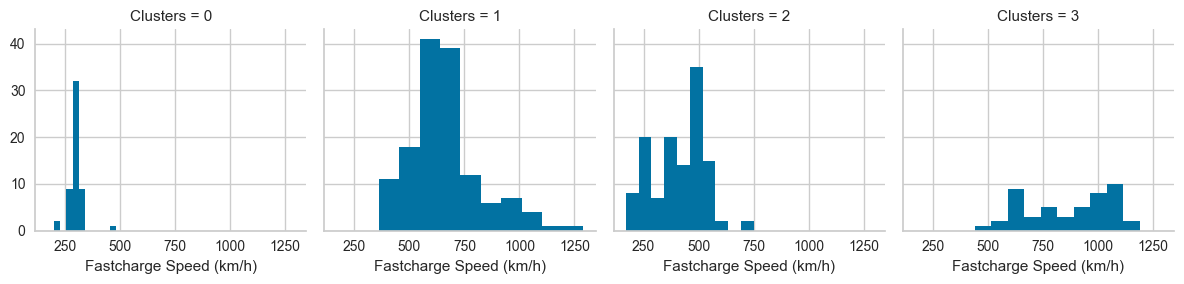

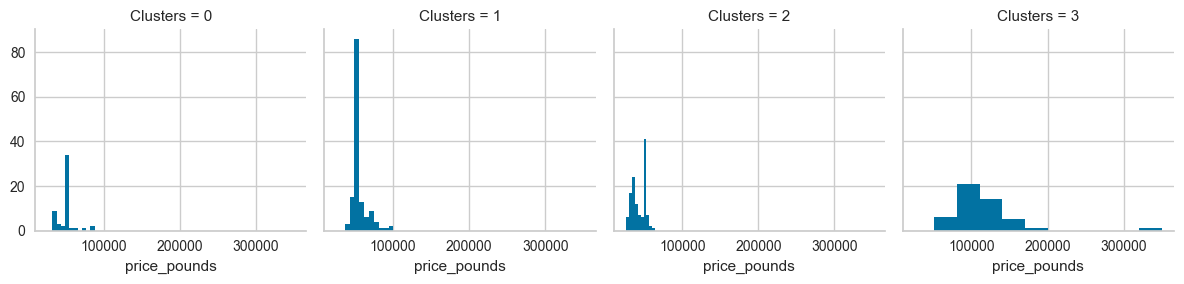

In [53]:
for c in df.iloc[:,1:].drop(['Clusters'], axis = 1):
    grid = sns.FacetGrid(df, col = 'Clusters')
    grid = grid.map(plt.hist, c)
plt.show()

### PCA for Dimensionality reduction

In [55]:
##converting df to 2d for better visualization of the clusters
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_scaled)
pca_df = pd.DataFrame(data = principal_components, columns= ['PC1', 'PC2'])
pca_df

,PC1,PC2
0,0.637228,-1.988816
1,1.092544,-0.875789
2,1.706671,-1.513286
3,-1.268040,-0.509928
4,0.449323,-2.121525
...,...,...
359,-2.815520,1.591688
360,-2.815520,1.591688
361,-2.899662,1.490886
362,-2.855652,1.783272


In [56]:
kmeans = KMeans(4)
kmeans.fit_predict(df_scaled)
pca_df_kmeans = pd.concat([pca_df, pd.DataFrame(({'Cluster': kmeans.labels_}))], axis=1)

c:\Users\sjasm\anaconda3\envs\fastfoodenv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [60]:
pca_df_kmeans['Cluster'].unique()

array([0, 1, 3, 2])

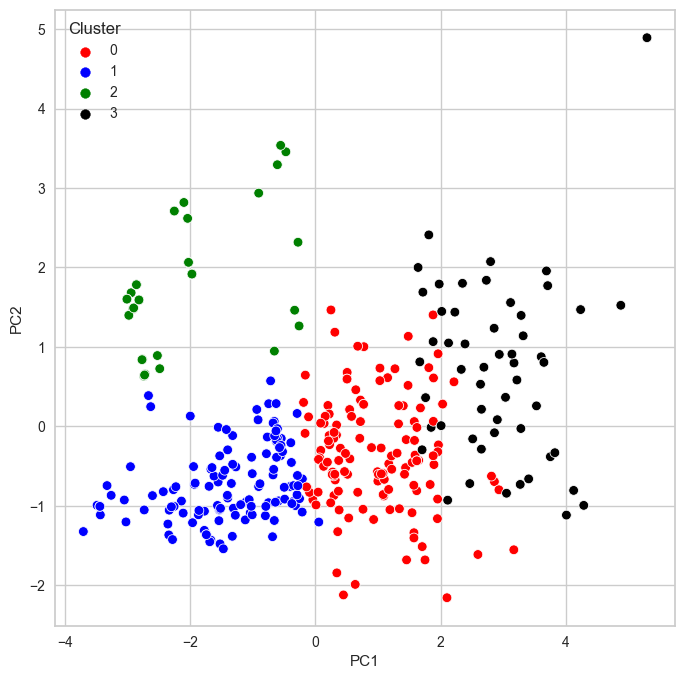

In [62]:
plt.figure(figsize=(8,8))
ax = sns.scatterplot(x = 'PC1', y = 'PC2', hue = 'Cluster', data = pca_df_kmeans, palette= ['red','blue', 'green', 'black'])
plt.show()

4 cluster visulization on pca data